In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from skimage import color, measure
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter

from __future__ import print_function

In [2]:
Tot = np.load('1fl_Wall.npy')

In [3]:
Full = max(Tot[:,3])
FullE = Tot[Tot[:,3]==Full] #Creates array of only full energy deposition
Conc = Tot[(Tot[:,3]<Full) & (Tot[:,6]>0)] #Creates array of less than full energy deposition - Concrete Scattered
Asph = Tot[(Tot[:,3]<Full) & (Tot[:,6]<=0)] #Creates array of less than full energy deposition - Asphault Scattered

In [4]:
# intersection function
def isect_line_plane_v3(p0, p1, p_co, p_no, epsilon=1e-6):
    """
    p0, p1: define the line - p0 is last point in air/material and p1 is detector interaction point
    p_co, p_no: define the plane:
        p_co is a point on the plane (plane coordinate).
        p_no is a normal vector defining the plane direction;
             (does not need to be normalized).

    return a Vector or None (when the intersection can't be found).
    """

    u = p0-p1
    dot = np.dot(p_no, u)

    if abs(dot) > epsilon:
        # the factor of the point between p0 -> p1 (0 - 1)
        # if 'fac' is between (0 - 1) the point intersects with the segment.
        # otherwise:
        #  < 0.0: behind p0.
        #  > 1.0: infront of p1.
        w = p0-p_co
        fac = -np.dot(p_no, w) / dot
        u = u*fac
        return p0+u
    else:
        # The segment is parallel to plane
        return None

In [5]:
def inters(surf): #finds where gamma particle departs surface
    intersections = []
    for i in range(len(surf)):
        spoint=np.array([surf[:,4][i], surf[:,5][i], surf[:,6][i]]) #last known point in material
        hpoint=np.array([surf[:,0][i], surf[:,1][i], surf[:,2][i]]) #hit point on detector
        o = isect_line_plane_v3(spoint,hpoint, p1, cp)
        intersections.append(o)
    return intersections

In [6]:
Roof = Tot[(Tot[:,6]>890)] #Creates array of interactions in the Roof - Total Detector Response
North = Tot[(Tot[:,7]<135) & (Tot[:,7]>45) & (Tot[:,6]>0) & (Tot[:,6]<890)] #Creates array of interactions in the North Wall
South = Tot[(Tot[:,7]<-45) & (Tot[:,7]>-135) & (Tot[:,6]>0) & (Tot[:,6]<890)] #Creates array of interactions in the South Wall
East = Tot[(Tot[:,7]<45) & (Tot[:,7]>-45) & (Tot[:,6]>0) & (Tot[:,6]<890)] #Creates array of interactions in the East Wall
West1 = Tot[(Tot[:,7]<-135) & (Tot[:,6]>0) & (Tot[:,6]<890)] #Creates array of interactions in the West Wall 
West2 = Tot[(Tot[:,7]>135) & (Tot[:,6]>0) & (Tot[:,6]<890)] #Creates array of interactions in the West Wall
West = np.vstack((West1,West2))
FullRoof = Tot[(Tot[:,6]>890) & (Tot[:,3]==Full)] #Creates array of interactions in the Roof - Full Energy Deposition
FullNorth = Tot[(Tot[:,7]<135) & (Tot[:,7]>45) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]==Full)] #Creates array of interactions in the North Wall
FullSouth = Tot[(Tot[:,7]<-45) & (Tot[:,7]>-135) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]==Full)] #Creates array of interactions in the South Wall
FullEast = Tot[(Tot[:,7]<45) & (Tot[:,7]>-45) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]==Full)] #Creates array of interactions in the East Wall
FullWest1 = Tot[(Tot[:,7]<-135) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]==Full)] #Creates array of interactions in the West Wall 
FullWest2 = Tot[(Tot[:,7]>135) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]==Full)] #Creates array of interactions in the West Wall
FullWest = np.vstack((FullWest1,FullWest2))
PartRoof = Tot[(Tot[:,6]>890) & (Tot[:,3]<Full)] #Creates array of interactions in the Roof - Partial Energy Deposition
PartNorth = Tot[(Tot[:,7]<135) & (Tot[:,7]>45) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]<Full)] #Creates array of interactions in the North Wall
PartSouth = Tot[(Tot[:,7]<-45) & (Tot[:,7]>-135) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]<Full)] #Creates array of interactions in the South Wall
PartEast = Tot[(Tot[:,7]<45) & (Tot[:,7]>-45) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]<Full)] #Creates array of interactions in the East Wall
PartWest1 = Tot[(Tot[:,7]<-135) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]<Full)] #Creates array of interactions in the West Wall 
PartWest2 = Tot[(Tot[:,7]>135) & (Tot[:,6]>0) & (Tot[:,6]<890) & (Tot[:,3]<Full)] #Creates array of interactions in the West Wall
PartWest = np.vstack((PartWest1,PartWest2))

In [7]:
#Defining North Wall Surface
p1 = np.array([0, 310, 0]) #Bottom Center Point
p2 = np.array([-255, 310, 1000]) #Top Left Point
p3 = np.array([255, 310, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)

In [8]:
intersections = inters(North)
tnx,tny,tnz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
NorthTot, _, __ = np.histogram2d(tnx,tnz, bins=[xedges, yedges])

In [9]:
intersections = inters(FullNorth)
fnx,fny,fnz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
NorthFull, _, __ = np.histogram2d(fnx,fnz, bins=[xedges, yedges])

In [10]:
intersections = inters(PartNorth)
pnx,pny,pnz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
NorthPart, _, __ = np.histogram2d(pnx,pnz, bins=[xedges, yedges])

In [11]:
known_loc = [56,6,65]

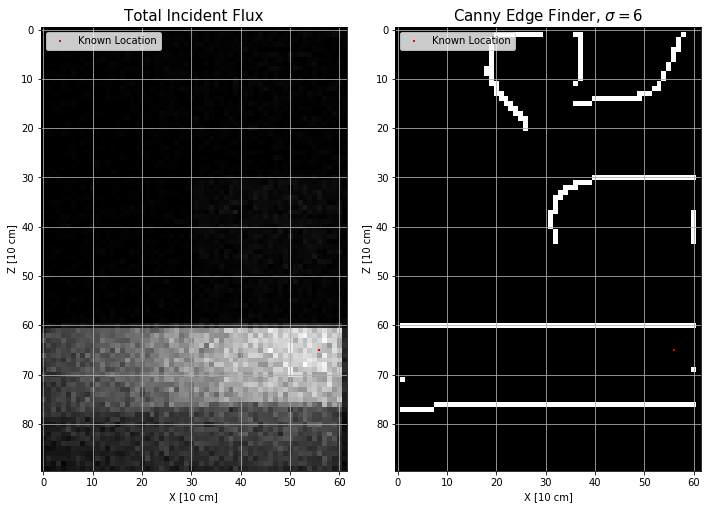

In [12]:
NTimg = np.flipud(NorthTot.T)
# Compute the Canny filter for two values of sigma
edges1 = canny(NTimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(NTimg, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Total Incident Flux', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Total_1fl_Wall_N.png',dpi=800, bbox_inches='tight')
plt.show()


(40.595009033113854, 20.596439228751706, 37.403401892750075)
430.0018255051094


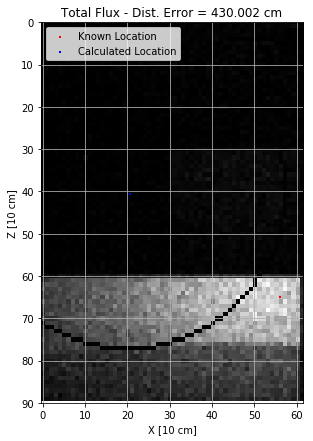

In [13]:
edges = canny(NTimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[0]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=NTimg.shape)

NTimg[rr, cc] = 1

NT = np.asarray([model.params[1], 62, model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(NTimg, cmap='gray')
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Total Flux - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Total_1fl_Wall_N.png', dpi=800, bbox_inches='tight')
plt.show()

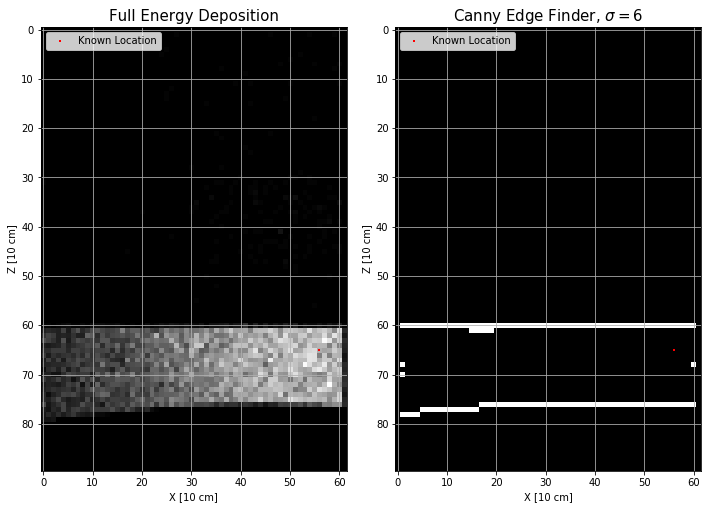

In [14]:
NFimg = np.flipud(NorthFull.T)

# Compute the Canny filter for two values of sigma
edges1 = canny(NFimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(NFimg, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Full Energy Deposition', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Full_1fl_Wall_N.png',dpi=800, bbox_inches='tight')
plt.show()

(355.8337893821299, 37.69638112105895, 280.129550485077)
2914.091891317681


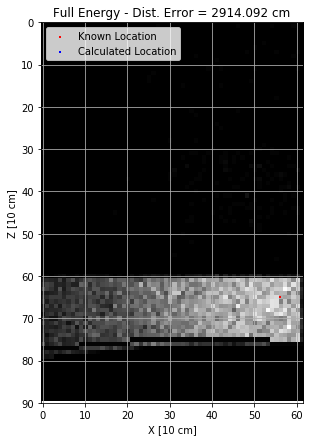

In [15]:
edges = canny(NFimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[0]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=NFimg.shape)

NFimg[rr, cc] = 1

NF = np.asarray([model.params[1], 62, model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(NFimg, cmap='gray')
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Full Energy - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Full_1fl_Wall_N.png', dpi=800, bbox_inches='tight')
plt.show()

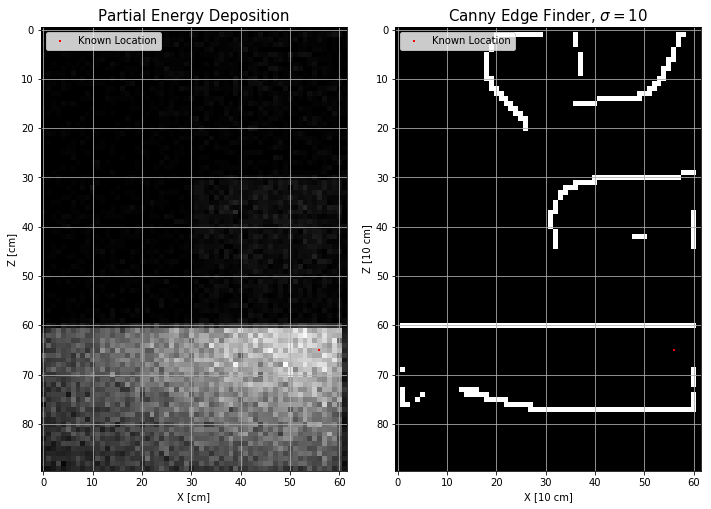

In [16]:
NPimg = np.flipud(NorthPart.T)

# Compute the Canny filter for two values of sigma
edges1 = canny(NPimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(NPimg, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [cm]')
plt.ylabel('Z [cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Partial Energy Deposition', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=10$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Part_1fl_Wall_N.png',dpi=800, bbox_inches='tight')
plt.show()

(46.10369592625176, 37.25299660209379, 33.233452730646036)
266.18047337260884


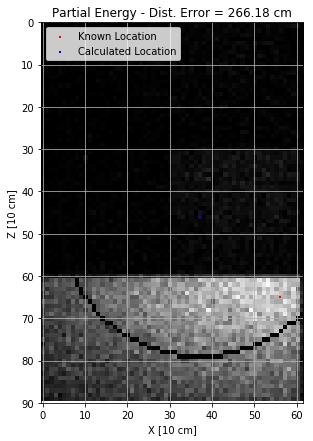

In [17]:
edges = canny(NPimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[0]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=NPimg.shape)

NPimg[rr, cc] = 1

NP = np.asarray([model.params[1], 62, model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(NPimg, cmap='gray')
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Partial Energy - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Part_1fl_Wall_N.png',dpi=800, bbox_inches='tight')
plt.show()

In [18]:
#Defining South Wall Surface
p1 = np.array([0, -310, 0]) #Bottom Center Point
p2 = np.array([-255, -310, 1000]) #Top Left Point
p3 = np.array([255, -310, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)

In [19]:
intersections = inters(South)
tnx,tny,tnz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
SouthTot, _, __ = np.histogram2d(tnx,tnz, bins=[xedges, yedges])

In [20]:
intersections = inters(FullSouth)
tnx,tny,tnz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
SouthFull, _, __ = np.histogram2d(tnx,tnz, bins=[xedges, yedges])

In [21]:
intersections = inters(PartSouth)
tnx,tny,tnz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
SouthPart, _, __ = np.histogram2d(tnx,tnz, bins=[xedges, yedges])

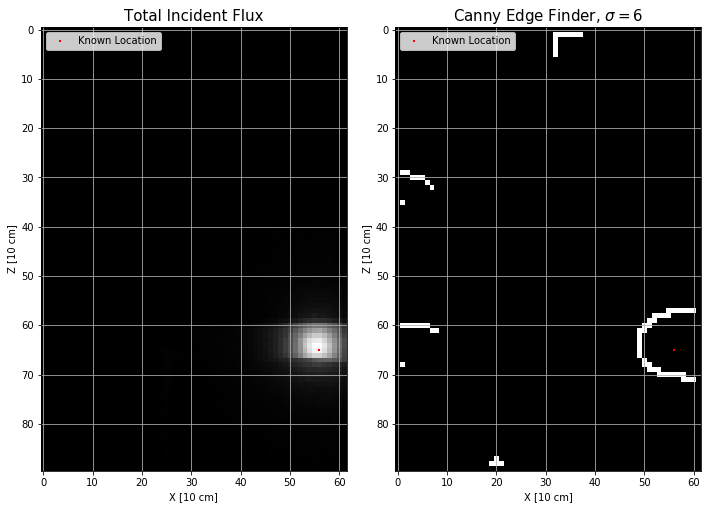

In [22]:
STimg = np.flipud(SouthTot.T)
# Compute the Canny filter for two values of sigma
edges1 = canny(STimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(STimg, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Total Incident Flux', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Total_1fl_Wall_S.png',dpi=800, bbox_inches='tight')
plt.show()

(35.81236323624765, 29.042765707008982, 34.17800206400375)
397.31733168589045


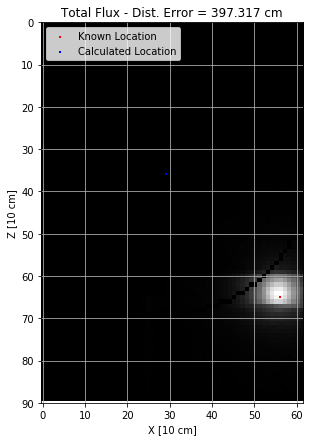

In [23]:
edges = canny(STimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[0]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=STimg.shape)

STimg[rr, cc] = 1

ST = np.asarray([model.params[1], 0, model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(STimg, cmap='gray')
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Total Flux - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Total_1fl_Wall_S.png',dpi=800, bbox_inches='tight')
plt.show()

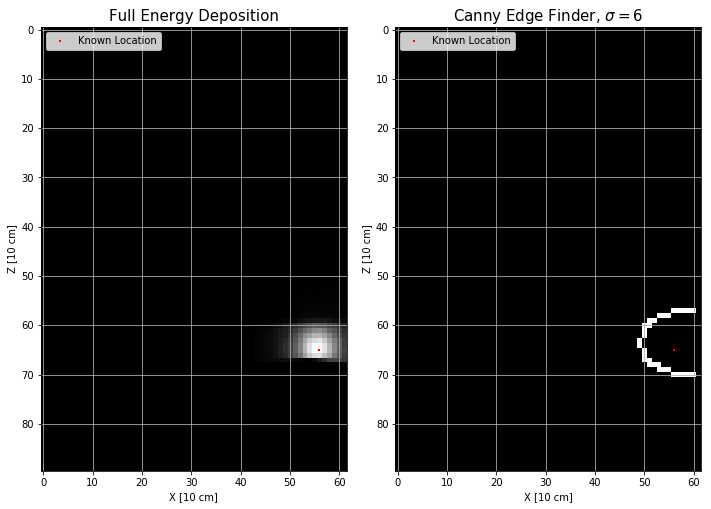

In [24]:
SFimg = np.flipud(SouthFull.T)

# Compute the Canny filter for two values of sigma
edges1 = canny(SFimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(SFimg, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Full Energy Deposition', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Full_1fl_Wall_S.png',dpi=800, bbox_inches='tight')
plt.show()

(63.46295875422766, 56.36184512238651, 6.6527078683203005)
15.790591134597546


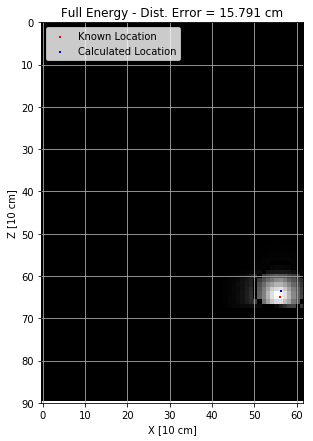

In [25]:
edges = canny(SFimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[0]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=SFimg.shape)

SFimg[rr, cc] = 1

SF = np.asarray([model.params[1], 0, model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(SFimg, cmap='gray')
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Full Energy - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Full_1fl_Wall_S.png',dpi=800, bbox_inches='tight')
plt.show()

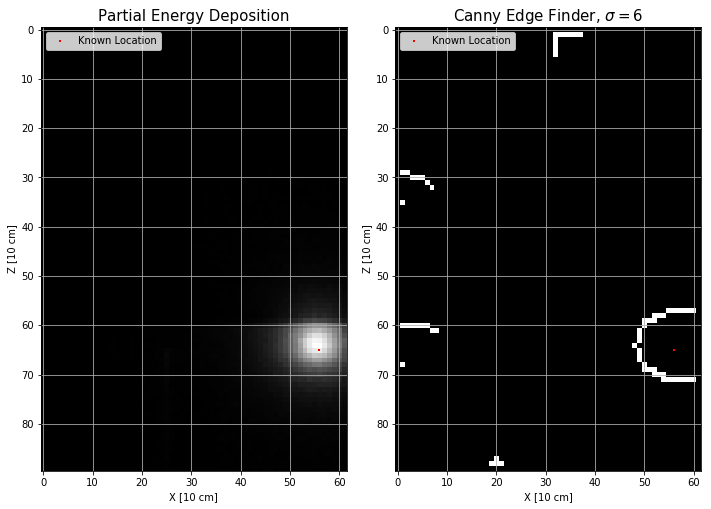

In [26]:
SPimg = np.flipud(SouthPart.T)

# Compute the Canny filter for two values of sigma
edges1 = canny(SPimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(SPimg, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Partial Energy Deposition', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Part_1fl_Wall_S.png',dpi=800, bbox_inches='tight')
plt.show()

(35.83848670886114, 29.09385946342715, 34.20618822571254)
396.77881193469455


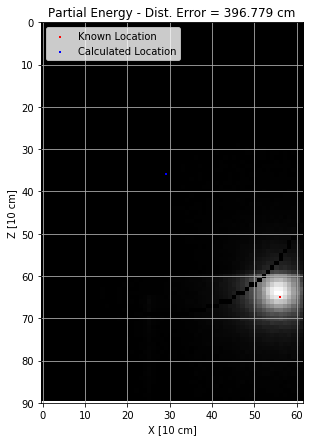

In [27]:
edges = canny(SPimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[0]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=SPimg.shape)

SPimg[rr, cc] = 1

SP = np.asarray([model.params[1], 0, model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(SPimg, cmap='gray')
plt.scatter(known_loc[0], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('X [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Partial Energy - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Part_1fl_Wall_S.png',dpi=800, bbox_inches='tight')
plt.show()

In [28]:
#Defining East Wall Surface
p1 = np.array([310, 0, 0]) #Bottom Center Point
p2 = np.array([310, 255, 1000]) #Top Left Point
p3 = np.array([310, -255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)

In [29]:
intersections = inters(East)
tex,tey,tez = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
EastTot, _, __ = np.histogram2d(tey,tez, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

In [30]:
intersections = inters(FullEast)
fex,fey,fez = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
EastFull, _, __ = np.histogram2d(fey,fez, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

In [31]:
intersections = inters(PartEast)
pex,pey,pez = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
EastPart, _, __ = np.histogram2d(pey,pez, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

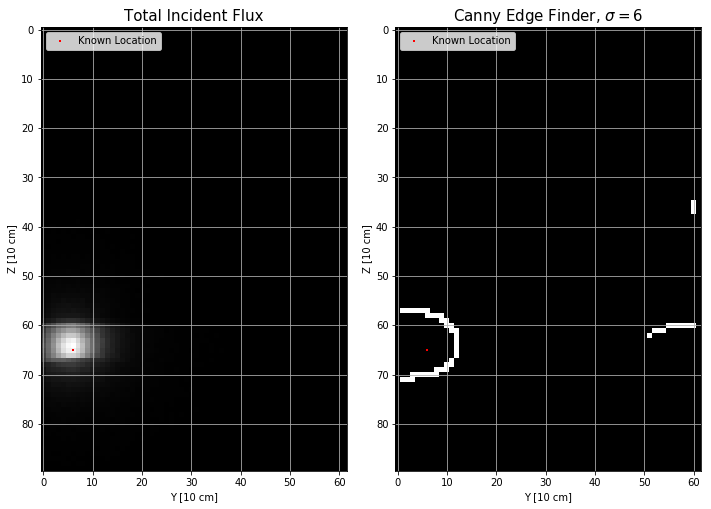

In [32]:
ETimg = np.flipud(EastTot.T)
# Compute the Canny filter for two values of sigma
edges1 = canny(ETimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(ETimg, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Total Incident Flux', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Total_1fl_Wall_E.png',dpi=800, bbox_inches='tight')
plt.show()

(63.82463742203436, 4.797589975820074, 6.976887150158292)
16.814479046138818


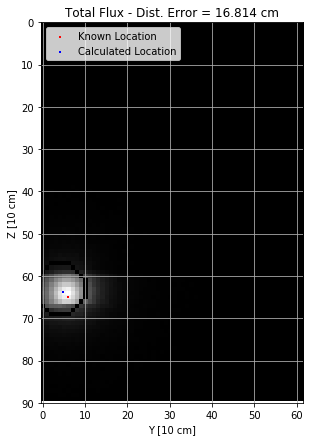

In [33]:
edges = canny(ETimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[1]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=ETimg.shape)

ETimg[rr, cc] = 1

ET = np.asarray([62, model.params[1], model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(ETimg, cmap='gray')
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Total Flux - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Total_1fl_Wall_E.png',dpi=800, bbox_inches='tight')
plt.show()

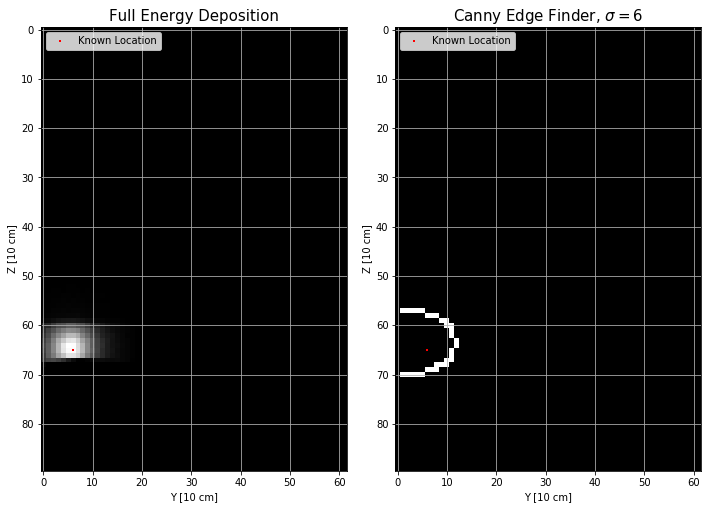

In [34]:
EFimg = np.flipud(EastFull.T)
# Compute the Canny filter for two values of sigma
edges1 = canny(EFimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(EFimg, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Full Energy Deposition', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Full_1fl_Wall_E.png',dpi=800, bbox_inches='tight')
plt.show()

(63.46295875422129, 4.638154877633042, 6.65270786832049)
20.535622533879128


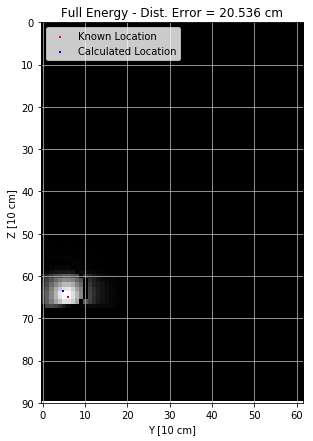

In [35]:
edges = canny(EFimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[1]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=EFimg.shape)

EFimg[rr, cc] = 1

EF = np.asarray([62, model.params[1], model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(EFimg, cmap='gray')
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Full Energy - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Full_1fl_Wall_E.png',dpi=800, bbox_inches='tight')
plt.show()

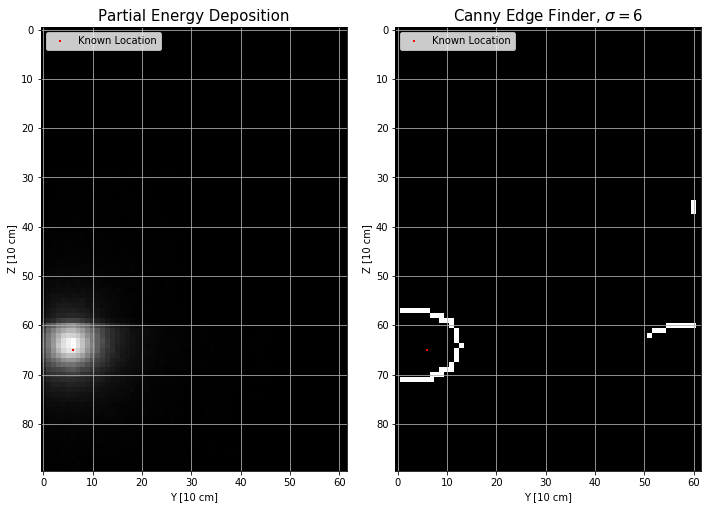

In [36]:
EPimg = np.flipud(EastPart.T)
# Compute the Canny filter for two values of sigma
edges1 = canny(EPimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(EPimg, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Partial Energy Deposition', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Part_1fl_Wall_E.png',dpi=800, bbox_inches='tight')
plt.show()

(64.00258827463131, 4.917135144808071, 7.249292153207219)
14.722182054684655


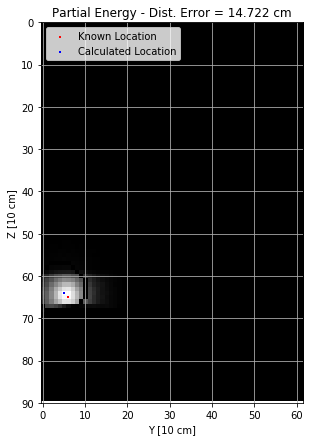

In [37]:
edges = canny(EPimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[1]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=EPimg.shape)

EPimg[rr, cc] = 1

EP = np.asarray([62, model.params[1], model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(EFimg, cmap='gray')
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Partial Energy - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Part_1fl_Wall_E.png',dpi=800, bbox_inches='tight')
plt.show()

In [38]:
#Defining West Wall Surface
p1 = np.array([-310, 0, 0]) #Bottom Center Point
p2 = np.array([-310, -255, 1000]) #Top Left Point
p3 = np.array([-310, 255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)

In [39]:
intersections = inters(West)
twx,twy,twz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
WestTot, _, __ = np.histogram2d(twy,twz, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

In [40]:
intersections = inters(FullWest)
fwx,fwy,fwz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
WestFull, _, __ = np.histogram2d(fwy,fwz, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

In [41]:
intersections = inters(PartWest)
pwx,pwy,pwz = map(list,zip(*intersections))
xedges = np.arange(-310.0, 310.1, 10.)
yedges = np.arange(0.0, 900.1, 10.)
WestPart, _, __ = np.histogram2d(pwy,pwz, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

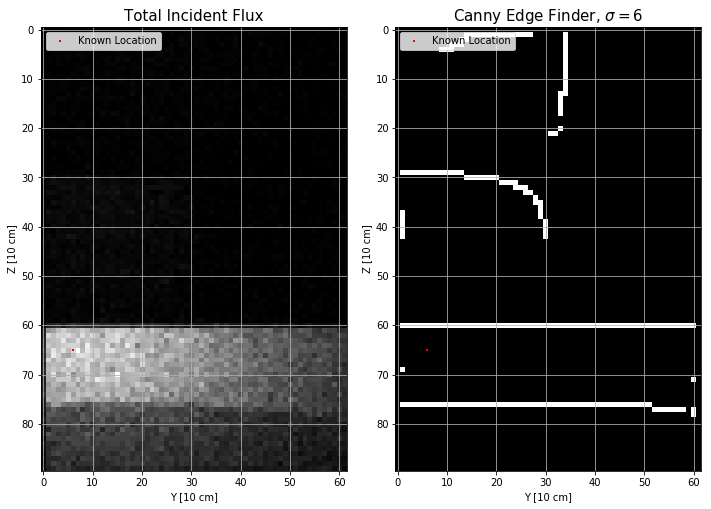

In [42]:
WTimg = np.flipud(WestTot.T)
# Compute the Canny filter for two values of sigma
edges1 = canny(WTimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(WTimg, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Total Incident Flux', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Total_1fl_Wall_W.png',dpi=800, bbox_inches='tight')
plt.show()

(39.327946335705604, 18.593862587724914, 37.69359779987532)
285.94749766712573


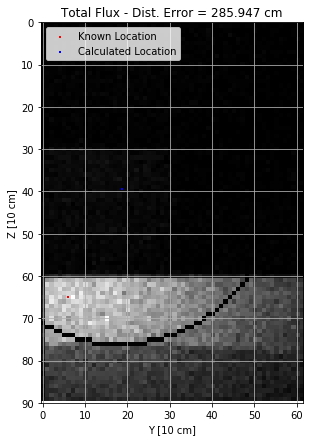

In [43]:
edges = canny(WTimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[1]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=WTimg.shape)

WTimg[rr, cc] = 1

WT = np.asarray([0, model.params[1], model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(WTimg, cmap='gray')
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Total Flux - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Total_1fl_Wall_W.png',dpi=800, bbox_inches='tight')
plt.show()

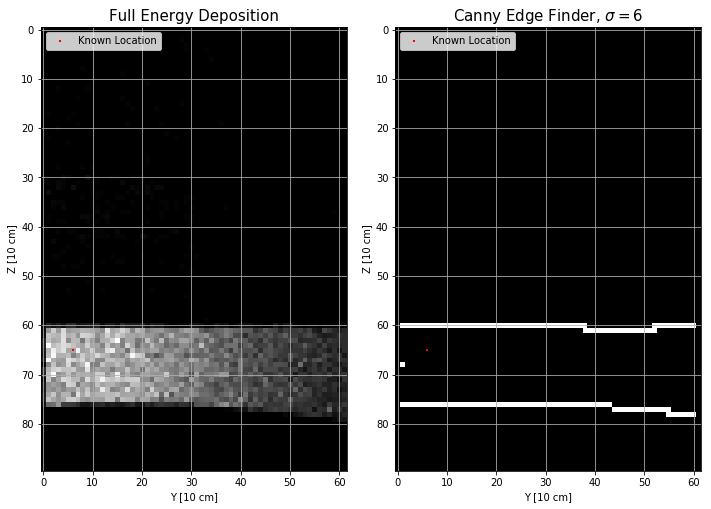

In [44]:
WFimg = np.flipud(WestFull.T)
# Compute the Canny filter for two values of sigma
edges1 = canny(WFimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(WFimg, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Full Energy Deposition', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Full_1fl_Wall_W.png',dpi=800, bbox_inches='tight')
plt.show()

(82.09672552482425, 33.75189229702579, 23.769889848336)
325.95483578816504


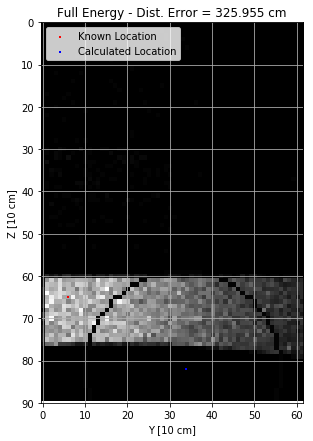

In [45]:
edges = canny(WFimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[1]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=WFimg.shape)

WFimg[rr, cc] = 1

WF = np.asarray([0, model.params[1], model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(WFimg, cmap='gray')
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Full Energy - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Full_1fl_Wall_W.png',dpi=800, bbox_inches='tight')
plt.show()

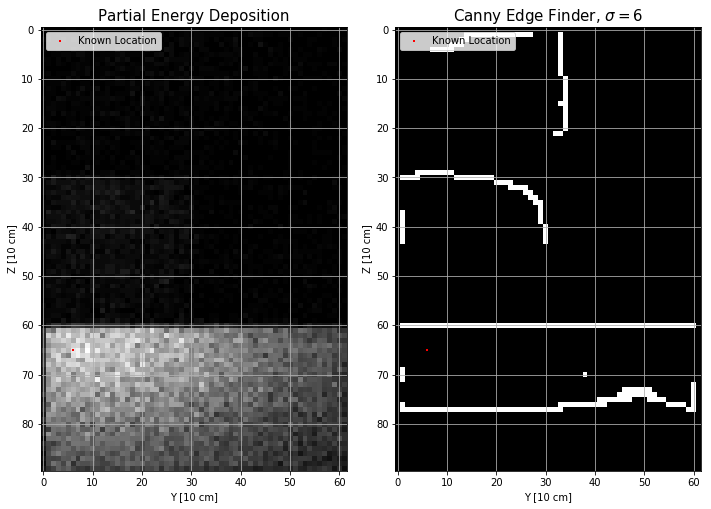

In [46]:
WPimg = np.flipud(WestPart.T)
# Compute the Canny filter for two values of sigma
edges1 = canny(WPimg, sigma=6)

# display results
plt.clf()
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.imshow(WPimg, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Partial Energy Deposition', fontsize=15)

plt.subplot(122)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+", label='Known Location')
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Canny Edge Finder, $\sigma=6$', fontsize=15)

plt.tight_layout()
plt.savefig('Images/Centroids/1Canny_Part_1fl_Wall_W.png',dpi=800, bbox_inches='tight')
plt.show()

(40.070580935973666, 22.45886520009057, 38.85166653969955)
298.7256565051941


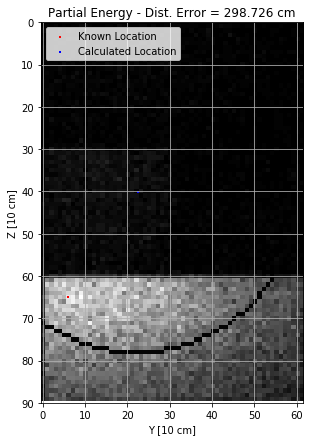

In [47]:
edges = canny(WPimg, sigma=6)
coords = np.column_stack(np.nonzero(edges))

model, inliers = measure.ransac(coords, measure.CircleModel, min_samples=10, residual_threshold=3, max_trials=1000)

print(model.params)
d_error = np.sqrt(((known_loc[1]-model.params[1])**2)+((known_loc[2]-model.params[0])**2))*10
print(d_error)

rr, cc = circle_perimeter(int(model.params[0]), int(model.params[1]), int(model.params[2]), shape=WPimg.shape)

WPimg[rr, cc] = 1

WP = np.asarray([0, model.params[1], model.params[0]])

plt.clf()
plt.figure(figsize=(10,7))
plt.imshow(WPimg, cmap='gray')
plt.scatter(known_loc[1], known_loc[2], s=5, c='r', marker="+" ,label='Known Location')
plt.scatter(model.params[1], model.params[0], s=5, c='b', marker="+", label='Calculated Location')
plt.grid(True)
plt.xlabel('Y [10 cm]')
plt.ylabel('Z [10 cm]')
plt.ylim(90,0)
plt.title('Partial Energy - Dist. Error = '+ str(round(d_error,3)) +' cm')
plt.legend(loc='upper left')
plt.savefig('Images/Centroids/2Cent_Part_1fl_Wall_W.png',dpi=800, bbox_inches='tight')
plt.show()

In [48]:
def closestDistanceBetweenLines(a0,a1,b0,b1,clampAll=False,clampA0=False,clampA1=False,clampB0=False,clampB1=False):

    ''' Given two lines defined by numpy.array pairs (a0,a1,b0,b1)
        Return the closest points on each segment and their distance
    '''

    # If clampAll=True, set all clamps to True
    if clampAll:
        clampA0=True
        clampA1=True
        clampB0=True
        clampB1=True


    # Calculate denomitator
    A = a1 - a0
    B = b1 - b0
    magA = np.linalg.norm(A)
    magB = np.linalg.norm(B)

    _A = A / magA
    _B = B / magB

    cross = np.cross(_A, _B);
    denom = np.linalg.norm(cross)**2


    # If lines are parallel (denom=0) test if lines overlap.
    # If they don't overlap then there is a closest point solution.
    # If they do overlap, there are infinite closest positions, but there is a closest distance
    if not denom:
        d0 = np.dot(_A,(b0-a0))

        # Overlap only possible with clamping
        if clampA0 or clampA1 or clampB0 or clampB1:
            d1 = np.dot(_A,(b1-a0))

            # Is segment B before A?
            if d0 <= 0 >= d1:
                if clampA0 and clampB1:
                    if np.absolute(d0) < np.absolute(d1):
                        return a0,b0,np.linalg.norm(a0-b0)
                    return a0,b1,np.linalg.norm(a0-b1)


            # Is segment B after A?
            elif d0 >= magA <= d1:
                if clampA1 and clampB0:
                    if np.absolute(d0) < np.absolute(d1):
                        return a1,b0,np.linalg.norm(a1-b0)
                    return a1,b1,np.linalg.norm(a1-b1)


        # Segments overlap, return distance between parallel segments
        return None,None,np.linalg.norm(((d0*_A)+a0)-b0)



    # Lines criss-cross: Calculate the projected closest points
    t = (b0 - a0);
    detA = np.linalg.det([t, _B, cross])
    detB = np.linalg.det([t, _A, cross])

    t0 = detA/denom;
    t1 = detB/denom;

    pA = a0 + (_A * t0) # Projected closest point on segment A
    pB = b0 + (_B * t1) # Projected closest point on segment B


    # Clamp projections
    if clampA0 or clampA1 or clampB0 or clampB1:
        if clampA0 and t0 < 0:
            pA = a0
        elif clampA1 and t0 > magA:
            pA = a1

        if clampB0 and t1 < 0:
            pB = b0
        elif clampB1 and t1 > magB:
            pB = b1

        # Clamp projection A
        if (clampA0 and t0 < 0) or (clampA1 and t0 > magA):
            dot = np.dot(_B,(pA-b0))
            if clampB0 and dot < 0:
                dot = 0
            elif clampB1 and dot > magB:
                dot = magB
            pB = b0 + (_B * dot)

        # Clamp projection B
        if (clampB0 and t1 < 0) or (clampB1 and t1 > magB):
            dot = np.dot(_A,(pB-a0))
            if clampA0 and dot < 0:
                dot = 0
            elif clampA1 and dot > magA:
                dot = magA
            pA = a0 + (_A * dot)


    return pA,pB,np.linalg.norm(pA-pB)


In [49]:
tp1,tp2,tdist = closestDistanceBetweenLines(NT,ST,ET,WT,clampAll=True)
print(tp1,tp2, tdist)

[26.97913281 15.14803387 36.98087421] [22.24451144 13.6440022  48.116929  ] 12.193870057962958


In [50]:
TP=[(tp1[0]+tp2[0])/2, (tp1[1]+tp2[1])/2, (tp1[2]+tp2[2])/2]
print(TP)

[24.611822125639897, 14.396018035761337, 42.54890160570119]


In [51]:
d_error = np.sqrt(((known_loc[0]-TP[0])**2)+((known_loc[1]-TP[1])**2)+((known_loc[2]-TP[2])**2))*10
print(d_error)

394.93830508571654


In [52]:
fp1,fp2,fdist = closestDistanceBetweenLines(NF,SF,EF,WF,clampAll=True)

In [53]:
FP=[(fp1[0]+fp2[0])/2, (fp1[1]+fp2[1])/2, (fp1[2]+fp2[2])/2]
print(FP)

[57.4247099443663, 3.3339305005864652, 65.01520323005566]


In [54]:
d_error = np.sqrt(((known_loc[0]-FP[0])**2)+((known_loc[1]-FP[1])**2)+((known_loc[2]-FP[2])**2))*10
print(d_error)

30.229052481815376


In [55]:
pp1,pp2,pdist = closestDistanceBetweenLines(NP,SP,EP,WP,clampAll=True)

In [56]:
PP=[(pp1[0]+pp2[0])/2, (pp1[1]+pp2[1])/2, (pp1[2]+pp2[2])/2]
print(PP)

[28.79611674173819, 15.6502638364954, 44.3899828134964]


In [57]:
d_error = np.sqrt(((known_loc[0]-PP[0])**2)+((known_loc[1]-PP[1])**2)+((known_loc[2]-PP[2])**2))*10
print(d_error)

354.6761431039705


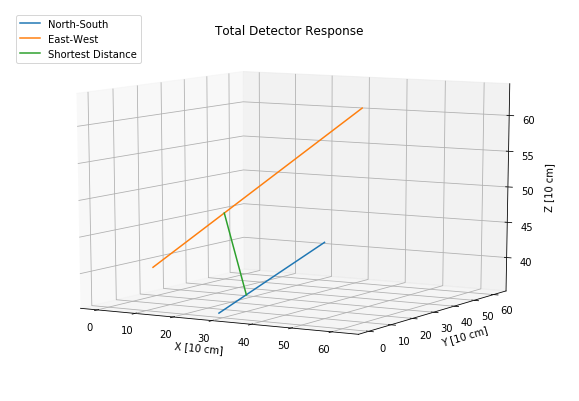

In [58]:
VecStart_x = [NT[0],ET[0],tp1[0]]
VecStart_y = [NT[1],ET[1],tp1[1]]
VecStart_z = [NT[2],ET[2],tp1[2]]
VecEnd_x = [ST[0],WT[0],tp2[0]]
VecEnd_y = [ST[1],WT[1],tp2[1]]
VecEnd_z  =[ST[2],WT[2],tp2[2]]
Labels = ['North-South', 'East-West','Shortest Distance']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.plot([VecStart_x[i], VecEnd_x[i]], [VecStart_y[i],VecEnd_y[i]],zs=[VecStart_z[i],VecEnd_z[i]],label=Labels[i])
    #ax.set_xlim3d(40,50)
    #ax.set_ylim3d(40,50)
    #ax.set_zlim3d(43,47)
    ax.view_init(10)
    ax.set_xlabel('X [10 cm]')
    ax.set_ylabel('Y [10 cm]')
    ax.set_zlabel('Z [10 cm]')
plt.title('Total Detector Response')
plt.legend(loc='upper left')
plt.show()